In [21]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: E:\CodingNinjas\MachineLearning\Week-6\DecisionTrees_2\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h2bbff1b_8          19 KB
    brotli-bin-1.0.9           |       h2bbff1b_8          29 KB
    contourpy-1.2.0            |  py312h59b6b97_0         200 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.51.0           |  py312h2bbff1b_0         2.5 MB
    kiwisolver-1.4.4           |  py312hd77b12b_0          54 KB
    libbrotlicommon-1.0.9      |       h2bbff1b_8          79 KB
    libbrotlidec-1.0.9         |       h2bbff1b_8          39 KB
    libbrotlienc-1.0.9         |       h2bbff1b_8         261 KB
    libgd-2.3.3                |       ha43c60

In [2]:
import pandas as pd
import numpy as np
import pydotplus

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.tree import export_graphviz

In [7]:
iris = datasets.load_iris()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [12]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix

In [35]:
def cnf(cnf, group_names = None, categories ='auto', count = True, percent = True, cbar=True, xyticks = True,
        xyplotlabels = True, sum_stats = True, figsize = None, cmap='Blues', title = None):
    """
    cf         : confusion matrix to be passed in
    group_names: List of strings that represents the lables row by row to be shown in each square
    categories : List of strings containing the categories to be displayed in the `x`, `y` axis.
    count      : If true, shows the raw number in the confusion matrix.
    normalize  : If true, show the proportions of each category.
    cbar       : If true, shows the color bar. The cbar values are based off the values in the confusion matrix. 
    xyticks    : If true, shows the x and y ticks
    sum_stats  : If true, displays the summary statistics below the figure.
    title      : If true, displays the title
    """
    blanks = ['' for i in range(cnf.size)]
    if group_names and len(group_names) == cnf.size:
        group_labels = ["{}\n".format(values) for values in group_names]
    else:
        group_labels = blanks
    if count:
        group_count = ['{0:0.0f}\n'.format(values) for values in cf.flatten()]
    else:
        group_count = blanks
    if percent:
        group_percentages = ['{0:0.2f}\n'.format(values} for values in cf.flatten()/np.sum(cf)]
    else:
        group_percentages= blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_count, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])
    if sum_stats:
        accuracy = np.trace(cnf)/np.sum(cnf)
        if len(cnf) == 2:
            precision = cf[1,1] / cf[:,1]
            recall = cf[1,1] / cf[1, :]
            f1_score = 2 * precision * recall / (precision + recall)
            stat_text = "Accuracy: {0:0.3f} \n Precision: {0:0.3f} \n Recall: {0:0.3f} \n f1_score: {0:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stat_text = "Accuracy: {0:0.3f}".format(accuracy)
    else:
        sum_stats = ""
    if figsize == None:
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks == False:
        categories = False

    plt.figure(figsize = figsize)
    sns.heatmap(cf, annot=box_lables, fmt="", cmap = cmap, cbar = cbar, xticklabels = categories, yticklabels = categories)
    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label"+stat_text)
    else:
        plt.xlabel(stat_text)
    if title:
        plt.title(title)
    
                                                                                                                 

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' (92558556.py, line 24)

In [30]:
37 + 34 + 41

112

In [45]:
cnf1 = confusion_matrix(y_train, y_train_pred)
cnf1[:,1]

array([ 0, 34,  0], dtype=int64)

In [43]:
cnf1

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]], dtype=int64)

In [19]:
confusion_matrix(y_test, y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

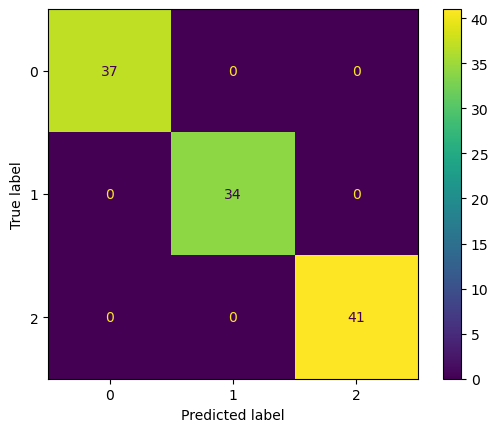

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)